# Data Cleaning

In [1]:
# import Libraries

import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
company_df=pd.read_csv(r'C:\projects\company_20220625.csv')

In [3]:
company_df1=company_df.copy()

In [4]:
company_df1

,Unnamed: 0,Company_Names,World_Ranks,Market_Cap,Headquarter_of_Company,Sector,Annual_Rev,Annual_Net_Inc,Total_Assets,Total_Employees,Employee_Count_as_on_Date,CEO
0,0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),World Rank (Jan-2020): 1,Market Cap (Jan-01-2020): 1898.10 Billion USD,Headquarters of Company: Saudi Arabia,"Sector: Energy, Oil and Gas, Chemicals, Oil Re...",Annual Revenue: Saudi Aramco Annual Revenues f...,Annual Net Income: Saudi Aramco Annual Net Inc...,Total Assets: Total Assets of Saudi Aramco as ...,"Total Employees: 79,800",Employee Count as on Date: As on March 2021,CEO: Amin H. Al-Nasser
1,1,APPLE,World Rank (Jan-2020): 2,Market Cap (Jan-01-2020): 1323.00 Billion USD,Headquarters of Company: USA,"Sector: Technology, Mobiles & Accessories, Ele...",Annual Revenue: Apple Annual Revenues for Sept...,Annual Net Income: Apple Annual Net Income for...,Total Assets: Apple Total Assets as on June-27...,"Total Employees: 154,000",Employee Count as on Date: As on 2021,CEO: Tim Cook
2,2,MICROSOFT CORPORATION,World Rank (Jan-2020): 3,Market Cap (Jan-01-2020): 1215.00 Billion USD,Headquarters of Company: USA,"Sector: Technology, Software and IT, Laptops, ...",Annual Revenue: Microsoft Annual Revenues for ...,Annual Net Income: Microsoft Annual Net Income...,Total Assets: Total Assets of Microsoft Corpor...,"Total Employees: 182,268",Employee Count as on Date: As on Dec-2021,CEO: Satya Nadella
3,3,ALPHABET,World Rank (Jan-2020): 4,Market Cap (Jan-01-2020): 943.90 Billion USD,Headquarters of Company: USA,"Sector: Technology, Internet or Mobile App Bas...",Annual Revenue: Alphabet Annual Revenues for D...,Annual Net Income: Alphabet Annual Net Income ...,Total Assets: 299.243 Billion USD as on Sep-2020,"Total Employees: 156,500",Employee Count as on Date: As on Dec-2021,CEO: Sundar Pichai
4,4,AMAZON.COM,World Rank (Jan-2020): 5,Market Cap (Jan-01-2020): 941.03 Billion USD,Headquarters of Company: USA,"Sector: eCommerce, Internet or Mobile App Base...",Annual Revenue: Amazon Annual Revenues for Dec...,Annual Net Income: Amazon Annual Net Income fo...,Total Assets: Total Assets of Amazon as on Jun...,"Total Employees: 1,335,000",Employee Count as on Date: As on 2021,CEO: Andy Jassy
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,SEVEN & I HOLDINGS,World Rank (Jan-2020): 471,Market Cap (Jan-01-2020): 32.65 Billion USD,Headquarters of Company: Japan,"Sector: Consumer Defensive, Retail, Super Mark...",Annual Revenue: SEVEN & I HOLDINGS Annual Reve...,Annual Net Income: SEVEN & I HOLDINGS Annual N...,NaN,"Total Employees: 138,808",Employee Count as on Date: As on 2021,CEO: Ryuichi Isaka
496,496,ASSICURAZIONI GENERALI,World Rank (Jan-2020): 472,Market Cap (Jan-01-2020): 32.61 Billion USD,Headquarters of Company: Italy,"Sector: Financial Services, Insurance",Annual Revenue: ASSICURAZIONI GENERALI Annual ...,Annual Net Income: ASSICURAZIONI GENERALI Annu...,NaN,"Total Employees: 72,644",Employee Count as on Date: As on May 2021,CEO: Philippe Donnet
497,497,AMPHENOL CORPORATION,World Rank (Jan-2020): 473,Market Cap (Jan-01-2020): 32.53 Billion USD,Headquarters of Company: USA,"Sector: Technology, Electronics, Cables and Wi...",Annual Revenue: AMPHENOL CORPORATION Annual Re...,Annual Net Income: AMPHENOL CORPORATION Annual...,NaN,"Total Employees: 90,000",Employee Count as on Date: As on 2021,CEO: Richard Adam Norwitt
498,498,GENERAL MILLS,World Rank (Jan-2020): 474,Market Cap (Jan-01-2020): 32.52 Billion USD,Headquarters of Company: USA,"Sector: Consumer Defensive, Food Products, FMC...",Annual Revenue: GENERAL MILLS Annual Revenues ...,Annual Net Income: GENERAL MILLS Annual Net In...,Total Assets: GENERAL MILLS Total Assets as on...,"Total Employees: 35,000",Employee Count as on Date: As on 2021,CEO: Jeff Harmening


In [5]:
# while extracting data column names are overwritten by the rows. so, we splitted the column into two columns. 

company_df1[['World_Ranks:', 'World_Ranks(Jan-2020)']]=company_df1['World_Ranks'].str.split(':', expand=True)
company_df1[['Market_Cap:', 'Market_Cap(In_Billion_USD)']]=company_df1['Market_Cap'].str.split(':', expand=True)

In [6]:
# while extracting data column names are overwritten by the rows. so, we replaced unwantted data with space.

company_df1['Annual_Rev']=company_df1['Annual_Rev'].str.strip().str.replace('Annual Revenue: ', '')
company_df1['Sector']=company_df['Sector'].str.strip().str.replace('Sector: ', '')
company_df1['Headquarter_of_Company']=company_df['Headquarter_of_Company'].str.strip().str.replace('Headquarters of Company: ', '')
company_df1['Annual_Net_Inc']=company_df1['Annual_Net_Inc'].str.strip().str.replace('Annual Net Income: ', '')
company_df1['Total_Assets']=company_df1['Total_Assets'].str.strip().str.replace('Total Assets: ', '')
company_df1['Total_Employees']=company_df1['Total_Employees'].str.strip().str.replace('Total Employees: ', '')
company_df1['Employee_Count_as_on_Date']=company_df1['Employee_Count_as_on_Date'].str.strip().str.replace('Employee Count as on Date: As on ', '')
company_df1['CEO']=company_df1['CEO'].str.strip().str.replace('CEO: ', '')

In [7]:
# here Market_cap column is in object dtype so, we want to convert it into numerical column then we replaced the Billion USD with space.

company_df1['Market_Cap(In_Billion_USD)']=company_df1['Market_Cap(In_Billion_USD)'].str.strip().str.replace('Billion USD', '')

In [8]:
# here we droped unwanted columns.

company_df1.drop(['Unnamed: 0','World_Ranks','Market_Cap','Market_Cap:','World_Ranks:'],axis=1,inplace=True)

In [9]:
company_df1

,Company_Names,Headquarter_of_Company,Sector,Annual_Rev,Annual_Net_Inc,Total_Assets,Total_Employees,Employee_Count_as_on_Date,CEO,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD)
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),Saudi Arabia,"Energy, Oil and Gas, Chemicals, Oil Refining, ...",Saudi Aramco Annual Revenues for December-2020...,Saudi Aramco Annual Net Income for December-20...,Total Assets of Saudi Aramco as on December-20...,"79,800",March 2021,Amin H. Al-Nasser,1,1898.10
1,APPLE,USA,"Technology, Mobiles & Accessories, Electronics...",Apple Annual Revenues for September-2020 endin...,Apple Annual Net Income for September-2020 end...,"Apple Total Assets as on June-27-2020 is 317,3...","154,000",2021,Tim Cook,2,1323.00
2,MICROSOFT CORPORATION,USA,"Technology, Software and IT, Laptops, Video Ga...",Microsoft Annual Revenues for June-2020 ending...,Microsoft Annual Net Income for June-2020 endi...,"Total Assets of Microsoft Corporation is 301,3...","182,268",Dec-2021,Satya Nadella,3,1215.00
3,ALPHABET,USA,"Technology, Internet or Mobile App Based Busin...",Alphabet Annual Revenues for December-2020 end...,Alphabet Annual Net Income for December-2020 e...,299.243 Billion USD as on Sep-2020,"156,500",Dec-2021,Sundar Pichai,4,943.90
4,AMAZON.COM,USA,"eCommerce, Internet or Mobile App Based Busine...",Amazon Annual Revenues for December-2020 endin...,Amazon Annual Net Income for December-2020 end...,"Total Assets of Amazon as on Jun-2020 is 110,9...","1,335,000",2021,Andy Jassy,5,941.03
...,...,...,...,...,...,...,...,...,...,...,...
495,SEVEN & I HOLDINGS,Japan,"Consumer Defensive, Retail, Super Markets, Con...",SEVEN & I HOLDINGS Annual Revenues as on Decem...,SEVEN & I HOLDINGS Annual Net Income as on Dec...,NaN,"138,808",2021,Ryuichi Isaka,471,32.65
496,ASSICURAZIONI GENERALI,Italy,"Financial Services, Insurance",ASSICURAZIONI GENERALI Annual Revenues as on D...,ASSICURAZIONI GENERALI Annual Net Income as on...,NaN,"72,644",May 2021,Philippe Donnet,472,32.61
497,AMPHENOL CORPORATION,USA,"Technology, Electronics, Cables and Wires, Ele...",AMPHENOL CORPORATION Annual Revenues as on Dec...,AMPHENOL CORPORATION Annual Net Income as on D...,NaN,"90,000",2021,Richard Adam Norwitt,473,32.53
498,GENERAL MILLS,USA,"Consumer Defensive, Food Products, FMCG, Dairy...",GENERAL MILLS Annual Revenues as on December-2...,GENERAL MILLS Annual Net Income as on December...,GENERAL MILLS Total Assets as on August-2020 i...,"35,000",2021,Jeff Harmening,474,32.52


In [10]:
# actually, we want to split Annual_Rev column with 'is' but there is also ':' in it so, we replaced ':' with 'is'.

company_df1['Annual_Rev']=company_df1['Annual_Rev'].str.strip().str.replace(':', 'is')
company_df1['Annual_Rev']=company_df1['Annual_Rev'].str.strip().str.replace('is', ',')

In [11]:
#here,we splitted the Annual_Rev column with ',' and stored it in a new column Annual_Revenue

company_df1['Annual_revenue']=company_df1['Annual_Rev'].apply(lambda x:str(x).split(",")).apply(lambda x:x[-1])

In [12]:
# while we splitting the Annual_Revenue column with ',' we got some unwanted data so,we used indexing because there is no common data in between them.

company_df1['Annual_revenue'][62]=company_df1['Annual_revenue'][62][63:]
company_df1['Annual_revenue'][486]= company_df1['Annual_revenue'][486][:15]
company_df1['Annual_revenue'][480]=company_df1['Annual_revenue'][480][:15]
company_df1['Annual_revenue'][471]=company_df1['Annual_revenue'][471][:17]
company_df1['Annual_revenue'][469]=company_df1['Annual_revenue'][469][37:]
company_df1['Annual_revenue'][457]=company_df1['Annual_revenue'][457][:15]
company_df1['Annual_revenue'][440]=company_df1['Annual_revenue'][440][:15]
company_df1['Annual_revenue'][438]=company_df1['Annual_revenue'][438][:15]
company_df1['Annual_revenue'][214]=company_df1['Annual_revenue'][214][28:]
company_df1['Annual_revenue'][133]=company_df1['Annual_revenue'][133][:17]
company_df1['Annual_revenue'][436]=company_df1['Annual_revenue'][436][:15]
company_df1['Annual_revenue'][424]=company_df1['Annual_revenue'][424][:15]

In [13]:
# we got some unwanted data like (Loss) so,we replacd (Loss) with space

company_df1['Annual_revenue']=company_df1['Annual_revenue'].str.strip().str.replace('(Loss)', '')

In [14]:
# actually, we want to split Annual_Net_Inc column with 'is' but there is also ':' in it so, we replaced ':' with 'is'.

company_df1['Annual_Net_Inc']=company_df1['Annual_Net_Inc'].str.strip().str.replace(':', 'is')
company_df1['Annual_Net_Inc']=company_df1['Annual_Net_Inc'].str.strip().str.replace('is', ',')

In [15]:
#here,we splitted the Annual_Net_Inc column with ',' and stored it in a new column Annual_Net_Inc

company_df1['Annual_Net_income']=company_df1['Annual_Net_Inc'].apply(lambda x:str(x).split(",")).apply(lambda x:x[-1])

In [16]:
# while we splitting the Annual_Net_Income column with ',' we got some unwanted data so,we used indexing because there is no common data in between them

company_df1['Annual_Net_income'][62]=company_df1['Annual_Net_income'][62][65:]
company_df1['Annual_Net_income'][133]=company_df1['Annual_Net_income'][133][:15]
company_df1['Annual_Net_income'][214]=company_df1['Annual_Net_income'][214][28:]
company_df1['Annual_Net_income'][224]=company_df1['Annual_Net_income'][224][:16]
company_df1['Annual_Net_income'][424]=company_df1['Annual_Net_income'][424][:15]
company_df1['Annual_Net_income'][436]=company_df1['Annual_Net_income'][436][:15]
company_df1['Annual_Net_income'][438]=company_df1['Annual_Net_income'][438][:15]
company_df1['Annual_Net_income'][440]=company_df1['Annual_Net_income'][440][:17]
company_df1['Annual_Net_income'][457]=company_df1['Annual_Net_income'][457][:15]
company_df1['Annual_Net_income'][471]=company_df1['Annual_Net_income'][471][:17]
company_df1['Annual_Net_income'][480]=company_df1['Annual_Net_income'][480][:15]
company_df1['Annual_Net_income'][486]=company_df1['Annual_Net_income'][486][:15]

In [17]:
# we got some unwanted data like (Loss),(LOSS),() .so,we replacd (Loss) with space

company_df1['Annual_Net_income']=company_df1['Annual_Net_income'].str.strip().str.replace('(Loss)', '')
company_df1['Annual_Net_income']=company_df1['Annual_Net_income'].str.strip().str.replace('(LOSS)', '')
company_df1['Annual_Net_income']=company_df1['Annual_Net_income'].str.strip().str.replace('()', '')

In [18]:
# we used strip to remove the unwanted data like '(' , ')' ,' ' 
company_df1['Annual_Net_income']=company_df1['Annual_Net_income'].apply(lambda x:str(x).strip("(").strip(")").strip("(").strip(")").strip(" "))
company_df1['Annual_Net_income']=company_df1['Annual_Net_income'].apply(lambda x:str(x).strip(")").strip(" "))

In [19]:
company_df1['Annual_Net_income']=company_df1['Annual_Net_income'].str.strip().str.replace('(', '').str.replace(')','')

In [20]:
# first we stored the month name and year in one column and then we extracted just year in it by using the regular expressions.

company_df1['Annual_Revenue_till']=company_df1["Annual_Rev"].apply(lambda x:str(re.findall("\s([A-Za-z]+[\s|-]\d\d\d\d)\s",str(x))))
company_df1['Annual_Revenue_till']=company_df1["Annual_Revenue_till"].apply(lambda x:str(re.findall("\d\d\d\d",str(x))))

In [21]:
# first we stored the month name and year in one column and then we extracted just year in it by using the regular expressions

company_df1['Annual_Net_Income_till']=company_df1["Annual_Net_Inc"].apply(lambda x:str(re.findall("\s([A-Za-z]+[\s|-]\d\d\d\d)\s",str(x))))
company_df1['Annual_Net_Income_till']=company_df1["Annual_Net_Income_till"].apply(lambda x:str(re.findall("\d\d\d\d",str(x))))

In [22]:
# we extracted only year from the Employee_Count_as_on_Date column by using regular expressions.

company_df1['Employee_Count_as_on_Date']=company_df1["Employee_Count_as_on_Date"].apply(lambda x:str(re.findall("\d\d\d\d",str(x))))

In [23]:
company_df1

,Company_Names,Headquarter_of_Company,Sector,Annual_Rev,Annual_Net_Inc,Total_Assets,Total_Employees,Employee_Count_as_on_Date,CEO,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Annual_revenue,Annual_Net_income,Annual_Revenue_till,Annual_Net_Income_till
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),Saudi Arabia,"Energy, Oil and Gas, Chemicals, Oil Refining, ...",Saudi Aramco Annual Revenues for December-2020...,Saudi Aramco Annual Net Income for December-20...,Total Assets of Saudi Aramco as on December-20...,"79,800",['2021'],Amin H. Al-Nasser,1,1898.10,862 Billion SAR,185 Billion SAR,['2020'],['2020']
1,APPLE,USA,"Technology, Mobiles & Accessories, Electronics...",Apple Annual Revenues for September-2020 endin...,Apple Annual Net Income for September-2020 end...,"Apple Total Assets as on June-27-2020 is 317,3...","154,000",['2021'],Tim Cook,2,1323.00,274.51 Billion USD,57.41 Billion USD,['2020'],['2020']
2,MICROSOFT CORPORATION,USA,"Technology, Software and IT, Laptops, Video Ga...",Microsoft Annual Revenues for June-2020 ending...,Microsoft Annual Net Income for June-2020 endi...,"Total Assets of Microsoft Corporation is 301,3...","182,268",['2021'],Satya Nadella,3,1215.00,143.00 Billion USD,44.30 Billion USD,['2020'],['2020']
3,ALPHABET,USA,"Technology, Internet or Mobile App Based Busin...",Alphabet Annual Revenues for December-2020 end...,Alphabet Annual Net Income for December-2020 e...,299.243 Billion USD as on Sep-2020,"156,500",['2021'],Sundar Pichai,4,943.90,182.52 Billion USD,40.26 Billion USD,['2020'],['2020']
4,AMAZON.COM,USA,"eCommerce, Internet or Mobile App Based Busine...",Amazon Annual Revenues for December-2020 endin...,Amazon Annual Net Income for December-2020 end...,"Total Assets of Amazon as on Jun-2020 is 110,9...","1,335,000",['2021'],Andy Jassy,5,941.03,386.06 Billion USD,21.33 Billion USD,['2020'],['2020']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,SEVEN & I HOLDINGS,Japan,"Consumer Defensive, Retail, Super Markets, Con...",SEVEN & I HOLDINGS Annual Revenues as on Decem...,SEVEN & I HOLDINGS Annual Net Income as on Dec...,NaN,"138,808",['2021'],Ryuichi Isaka,471,32.65,644 Billion JPY,218 Billion JPY,['2019'],['2019']
496,ASSICURAZIONI GENERALI,Italy,"Financial Services, Insurance",ASSICURAZIONI GENERALI Annual Revenues as on D...,ASSICURAZIONI GENERALI Annual Net Income as on...,NaN,"72,644",['2021'],Philippe Donnet,472,32.61,693 Million EUR,670 Million EUR,['2019'],['2019']
497,AMPHENOL CORPORATION,USA,"Technology, Electronics, Cables and Wires, Ele...",AMPHENOL CORPORATION Annual Revenues as on Dec...,AMPHENOL CORPORATION Annual Net Income as on D...,NaN,"90,000",['2021'],Richard Adam Norwitt,473,32.53,225 Million USD,155 Million USD,['2019'],['2019']
498,GENERAL MILLS,USA,"Consumer Defensive, Food Products, FMCG, Dairy...",GENERAL MILLS Annual Revenues as on December-2...,GENERAL MILLS Annual Net Income as on December...,GENERAL MILLS Total Assets as on August-2020 i...,"35,000",['2021'],Jeff Harmening,474,32.52,627 Million USD,181 Million USD,['2019'],['2019']


In [24]:
# the columns Annual_Revenue_till,Annual_Net_Income_till,Employee_Count_as_on_Date taken the data in a list,so we used  strip to remove the '[',']' ,"''"

company_df1['Annual_Revenue_till']=company_df1['Annual_Revenue_till'].apply(lambda x:str(x).strip("[").strip("]").strip("''"))
company_df1['Annual_Net_Income_till']=company_df1['Annual_Net_Income_till'].apply(lambda x:str(x).strip("[").strip("]").strip("''"))
company_df1['Employee_Count_as_on_Date']=company_df1['Employee_Count_as_on_Date'].apply(lambda x:str(x).strip("[").strip("]").strip("''"))

In [25]:
# here we droped unwanted columns 

company_df1.drop(['Annual_Rev','Annual_Net_Inc'],axis=1,inplace=True)

In [26]:
# we stored all the columns in new dataframe final_df in a order
final_df=company_df1[['Company_Names','World_Ranks(Jan-2020)', 'Market_Cap(In_Billion_USD)','Headquarter_of_Company','Annual_Revenue_till', 'Annual_revenue','Annual_Net_Income_till','Annual_Net_income','Sector','Total_Assets',
    'Total_Employees', 'Employee_Count_as_on_Date',
       'CEO']]       

In [162]:
final_df.head()

,Company_Names,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Headquarter_of_Company,Annual_Revenue_till,Annual_revenue,Annual_Net_Income_till,Annual_Net_income,Sector,Total_Assets,Total_Employees,Employee_Count_as_on_Date,CEO
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),1,1898.10,Saudi Arabia,2020,862 Billion SAR,2020,185 Billion SAR,"Energy, Oil and Gas, Chemicals, Oil Refining, ...",Total Assets of Saudi Aramco as on December-20...,"79,800",2021,Amin H. Al-Nasser
1,APPLE,2,1323.00,USA,2020,274.51 Billion USD,2020,57.41 Billion USD,"Technology, Mobiles & Accessories, Electronics...","Apple Total Assets as on June-27-2020 is 317,3...","154,000",2021,Tim Cook
2,MICROSOFT CORPORATION,3,1215.00,USA,2020,143.00 Billion USD,2020,44.30 Billion USD,"Technology, Software and IT, Laptops, Video Ga...","Total Assets of Microsoft Corporation is 301,3...","182,268",2021,Satya Nadella
3,ALPHABET,4,943.90,USA,2020,182.52 Billion USD,2020,40.26 Billion USD,"Technology, Internet or Mobile App Based Busin...",299.243 Billion USD as on Sep-2020,"156,500",2021,Sundar Pichai
4,AMAZON.COM,5,941.03,USA,2020,386.06 Billion USD,2020,21.33 Billion USD,"eCommerce, Internet or Mobile App Based Busine...","Total Assets of Amazon as on Jun-2020 is 110,9...","1,335,000",2021,Andy Jassy


In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company_Names               500 non-null    object
 1   World_Ranks(Jan-2020)       500 non-null    object
 2   Market_Cap(In_Billion_USD)  474 non-null    object
 3   Headquarter_of_Company      500 non-null    object
 4   Annual_Revenue_till         500 non-null    object
 5   Annual_revenue              500 non-null    object
 6   Annual_Net_Income_till      500 non-null    object
 7   Annual_Net_income           500 non-null    object
 8   Sector                      500 non-null    object
 9   Total_Assets                254 non-null    object
 10  Total_Employees             498 non-null    object
 11  Employee_Count_as_on_Date   500 non-null    object
 12  CEO                         466 non-null    object
dtypes: object(13)
memory usage: 50.9+ KB


In [30]:
# we saved our data in csv and excel files
final_df.to_csv(r'C:\projects\Company_cleaned.csv')
final_df.to_excel(r'C:\projects\Company_cleaned.xlsx')

# Data Visualization

In [31]:
# import libraries
import pandas as pd
import numpy as np
import sidetable # for frequency table
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
# for HD visualizations
%config InlineBackend.figure_format='retina'

In [32]:
final_df1=pd.read_csv(r'C:\projects\company_cleaned.csv')

In [33]:
# we checked here whether the duplicated are exist or not

final_df1.duplicated().sum()

0

In [34]:
# while we cleaning the data ther are some blank column values so, we replaced with NaN values

final_df1.replace('', np.nan, inplace=True)

In [35]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  500 non-null    int64  
 1   Company_Names               500 non-null    object 
 2   World_Ranks(Jan-2020)       500 non-null    int64  
 3   Market_Cap(In_Billion_USD)  474 non-null    float64
 4   Headquarter_of_Company      500 non-null    object 
 5   Annual_Revenue_till         484 non-null    float64
 6   Annual_revenue              497 non-null    object 
 7   Annual_Net_Income_till      467 non-null    float64
 8   Annual_Net_income           481 non-null    object 
 9   Sector                      500 non-null    object 
 10  Total_Assets                254 non-null    object 
 11  Total_Employees             498 non-null    object 
 12  Employee_Count_as_on_Date   491 non-null    float64
 13  CEO                         466 non

In [36]:
final_df1.drop('Unnamed: 0',axis=1,inplace=True)

In [37]:
final_df1.isna().sum()

Company_Names                   0
World_Ranks(Jan-2020)           0
Market_Cap(In_Billion_USD)     26
Headquarter_of_Company          0
Annual_Revenue_till            16
Annual_revenue                  3
Annual_Net_Income_till         33
Annual_Net_income              19
Sector                          0
Total_Assets                  246
Total_Employees                 2
Employee_Count_as_on_Date       9
CEO                            34
dtype: int64

In [38]:
final_df1

,Company_Names,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Headquarter_of_Company,Annual_Revenue_till,Annual_revenue,Annual_Net_Income_till,Annual_Net_income,Sector,Total_Assets,Total_Employees,Employee_Count_as_on_Date,CEO
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),1,1898.10,Saudi Arabia,2020.0,862 Billion SAR,2020.0,185 Billion SAR,"Energy, Oil and Gas, Chemicals, Oil Refining, ...",Total Assets of Saudi Aramco as on December-20...,"79,800",2021.0,Amin H. Al-Nasser
1,APPLE,2,1323.00,USA,2020.0,274.51 Billion USD,2020.0,57.41 Billion USD,"Technology, Mobiles & Accessories, Electronics...","Apple Total Assets as on June-27-2020 is 317,3...","154,000",2021.0,Tim Cook
2,MICROSOFT CORPORATION,3,1215.00,USA,2020.0,143.00 Billion USD,2020.0,44.30 Billion USD,"Technology, Software and IT, Laptops, Video Ga...","Total Assets of Microsoft Corporation is 301,3...","182,268",2021.0,Satya Nadella
3,ALPHABET,4,943.90,USA,2020.0,182.52 Billion USD,2020.0,40.26 Billion USD,"Technology, Internet or Mobile App Based Busin...",299.243 Billion USD as on Sep-2020,"156,500",2021.0,Sundar Pichai
4,AMAZON.COM,5,941.03,USA,2020.0,386.06 Billion USD,2020.0,21.33 Billion USD,"eCommerce, Internet or Mobile App Based Busine...","Total Assets of Amazon as on Jun-2020 is 110,9...","1,335,000",2021.0,Andy Jassy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,SEVEN & I HOLDINGS,471,32.65,Japan,2019.0,644 Billion JPY,2019.0,218 Billion JPY,"Consumer Defensive, Retail, Super Markets, Con...",NaN,"138,808",2021.0,Ryuichi Isaka
496,ASSICURAZIONI GENERALI,472,32.61,Italy,2019.0,693 Million EUR,2019.0,670 Million EUR,"Financial Services, Insurance",NaN,"72,644",2021.0,Philippe Donnet
497,AMPHENOL CORPORATION,473,32.53,USA,2019.0,225 Million USD,2019.0,155 Million USD,"Technology, Electronics, Cables and Wires, Ele...",NaN,"90,000",2021.0,Richard Adam Norwitt
498,GENERAL MILLS,474,32.52,USA,2019.0,627 Million USD,2019.0,181 Million USD,"Consumer Defensive, Food Products, FMCG, Dairy...",GENERAL MILLS Total Assets as on August-2020 i...,"35,000",2021.0,Jeff Harmening


In [39]:
final_df1['Total_Employees']

0         79,800
1        154,000
2        182,268
3        156,500
4      1,335,000
         ...    
495      138,808
496       72,644
497       90,000
498       35,000
499      320,618
Name: Total_Employees, Length: 500, dtype: object

In [40]:
# here we converted the dtype object to float because column as NaN values

final_df1['Total_Employees']=final_df1['Total_Employees'].str.replace(',','').astype(float)
final_df1['Total_Employees']

0        79800.0
1       154000.0
2       182268.0
3       156500.0
4      1335000.0
         ...    
495     138808.0
496      72644.0
497      90000.0
498      35000.0
499     320618.0
Name: Total_Employees, Length: 500, dtype: float64

In [41]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Names               500 non-null    object 
 1   World_Ranks(Jan-2020)       500 non-null    int64  
 2   Market_Cap(In_Billion_USD)  474 non-null    float64
 3   Headquarter_of_Company      500 non-null    object 
 4   Annual_Revenue_till         484 non-null    float64
 5   Annual_revenue              497 non-null    object 
 6   Annual_Net_Income_till      467 non-null    float64
 7   Annual_Net_income           481 non-null    object 
 8   Sector                      500 non-null    object 
 9   Total_Assets                254 non-null    object 
 10  Total_Employees             498 non-null    float64
 11  Employee_Count_as_on_Date   491 non-null    float64
 12  CEO                         466 non-null    object 
dtypes: float64(5), int64(1), object(7)


In [42]:
np.sum(final_df1.isna().sum())

388

In [43]:
final_df1.isna().sum()

Company_Names                   0
World_Ranks(Jan-2020)           0
Market_Cap(In_Billion_USD)     26
Headquarter_of_Company          0
Annual_Revenue_till            16
Annual_revenue                  3
Annual_Net_Income_till         33
Annual_Net_income              19
Sector                          0
Total_Assets                  246
Total_Employees                 2
Employee_Count_as_on_Date       9
CEO                            34
dtype: int64

In [44]:
# we droped the entire column Total_Assets because the column as almost 50% missing values

final_df1.drop('Total_Assets',axis=1,inplace=True)

In [45]:
# the data is based on Market_Cap,Annual_revenue,Annual_Net_income so, we can't replace it with mean and median to effect the data

final_df1['Market_Cap(In_Billion_USD)'].interpolate(method='ffill', limit_direction='forward',inplace=True)
final_df1['Annual_revenue'].interpolate(method='ffill', limit_direction='forward',inplace=True)
final_df1['Annual_Net_income'].interpolate(method='ffill', limit_direction='forward',inplace=True)

In [46]:
final_df1.isna().sum()

Company_Names                  0
World_Ranks(Jan-2020)          0
Market_Cap(In_Billion_USD)     0
Headquarter_of_Company         0
Annual_Revenue_till           16
Annual_revenue                 0
Annual_Net_Income_till        33
Annual_Net_income              0
Sector                         0
Total_Employees                2
Employee_Count_as_on_Date      9
CEO                           34
dtype: int64

In [47]:
final_df1['Total_Employees'].mean()
final_df1['Total_Employees'].median()

108089.88353413655

58250.0

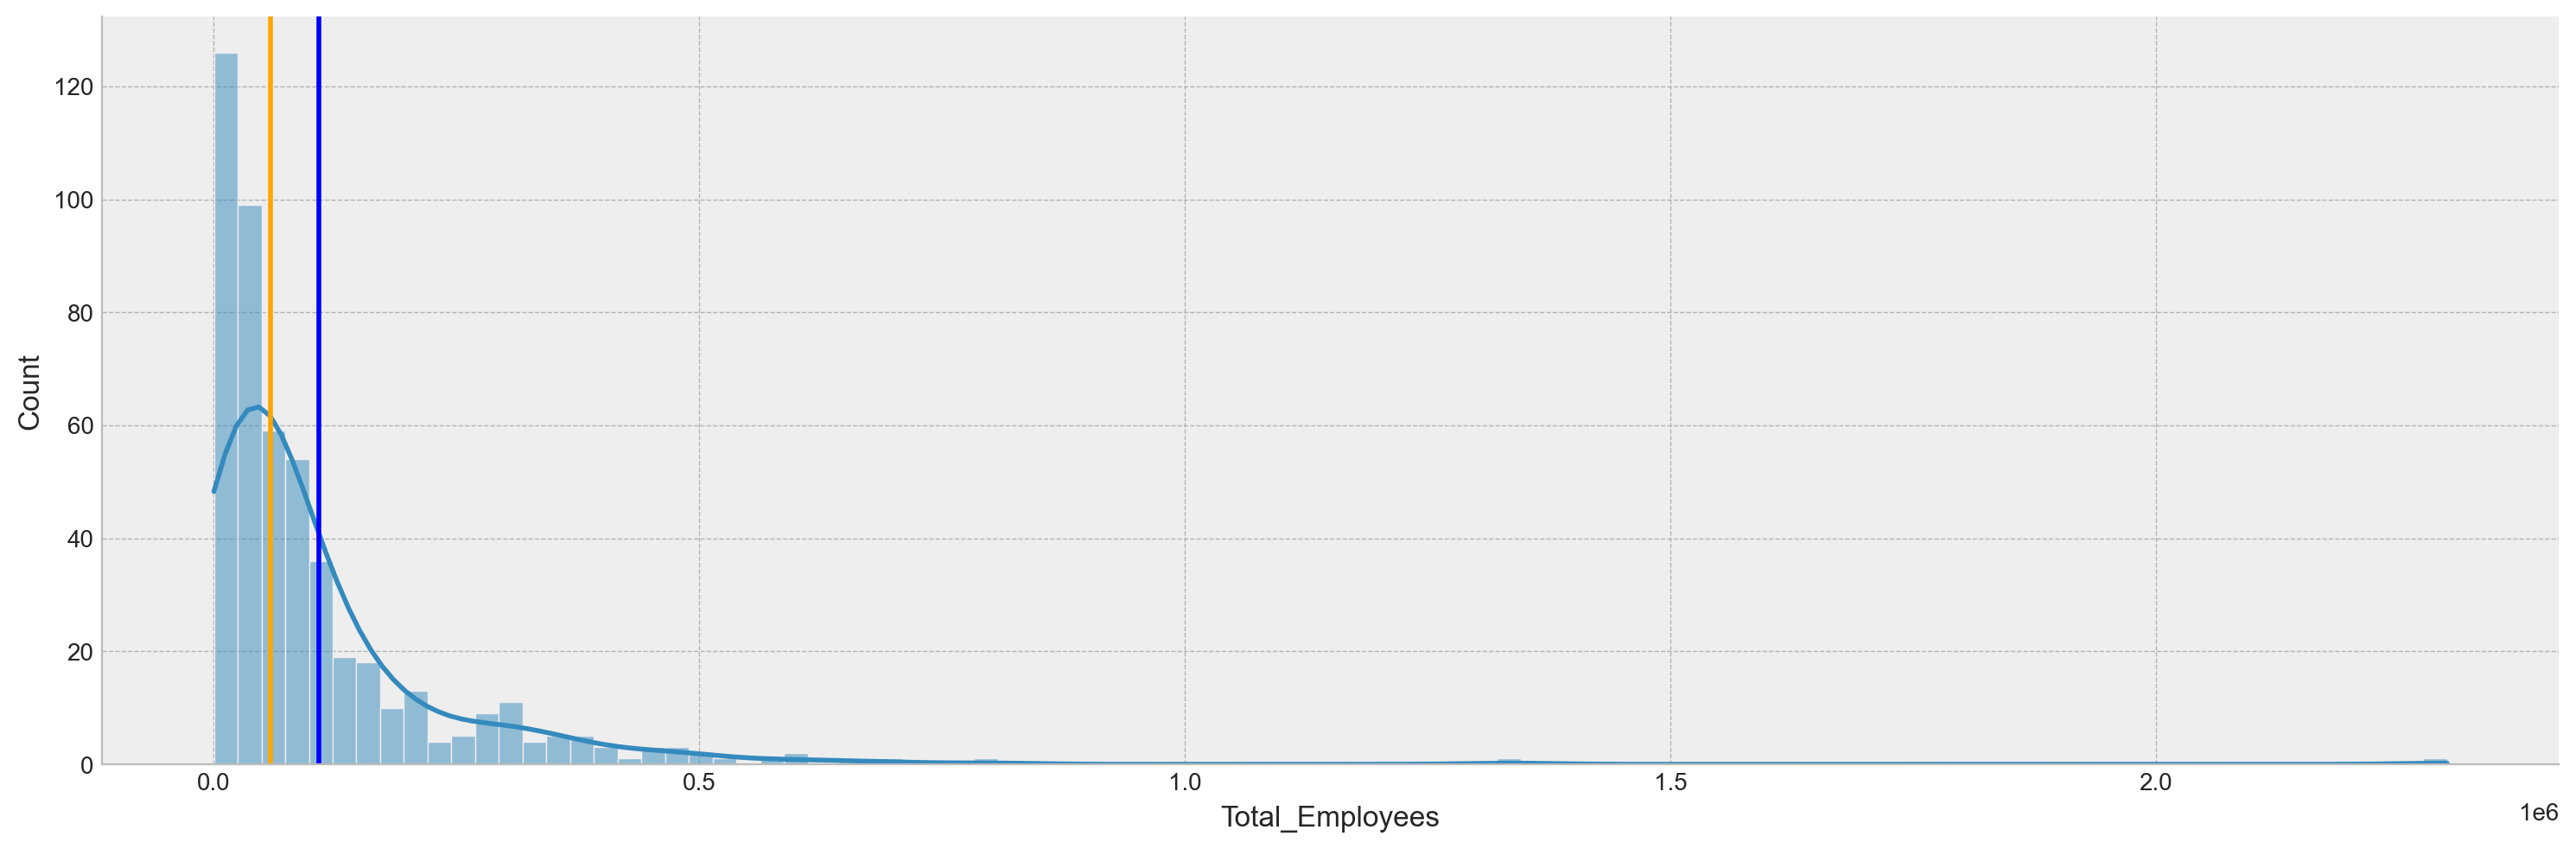

In [48]:
sns.displot(data = final_df1, x = final_df1.Total_Employees.astype(float), height = 5, aspect = 15/5, kde = True)
plt.axvline(final_df1.Total_Employees.astype(float).mean(), color = 'blue')
plt.axvline(final_df1.Total_Employees.astype(float).median(), color = 'orange');

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(data=final_df1, x = final_df1[~final_df1.Total_Employees.isna()]['Total_Employees']);


In [50]:
# the above distribution plot is not symmetric so, we used median to replace the NaN values

final_df1['Total_Employees'].fillna(final_df1['Total_Employees'].median(),inplace=True)

In [51]:
# here we converted the dtype float to int

final_df1['Total_Employees']=final_df1['Total_Employees'].astype(int)

In [52]:
final_df1['Total_Employees']

0        79800
1       154000
2       182268
3       156500
4      1335000
        ...   
495     138808
496      72644
497      90000
498      35000
499     320618
Name: Total_Employees, Length: 500, dtype: int32

In [53]:
final_df1.isna().sum()

Company_Names                  0
World_Ranks(Jan-2020)          0
Market_Cap(In_Billion_USD)     0
Headquarter_of_Company         0
Annual_Revenue_till           16
Annual_revenue                 0
Annual_Net_Income_till        33
Annual_Net_income              0
Sector                         0
Total_Employees                0
Employee_Count_as_on_Date      9
CEO                           34
dtype: int64

In [54]:
final_df1['Annual_Revenue_till'].fillna(final_df1['Annual_Revenue_till'].median(),inplace=True)
final_df1['Annual_Net_Income_till'].fillna(final_df1['Annual_Net_Income_till'].median(),inplace=True)
final_df1['Employee_Count_as_on_Date'].fillna(final_df1['Employee_Count_as_on_Date'].median(),inplace=True)

In [55]:
final_df1['Annual_Revenue_till']=final_df1['Annual_Revenue_till'].astype(int)
final_df1['Annual_Net_Income_till']=final_df1['Annual_Net_Income_till'].astype(int)
final_df1['Employee_Count_as_on_Date']=final_df1['Employee_Count_as_on_Date'].astype(int)

In [56]:
final_df1['Annual_Revenue_till']=final_df1['Annual_Revenue_till'].astype(str)
final_df1['Annual_Net_Income_till']=final_df1['Annual_Net_Income_till'].astype(str)
final_df1['Employee_Count_as_on_Date']=final_df1['Employee_Count_as_on_Date'].astype(str)

In [57]:
# here the columns are of dtype object so, we used mode 

final_df1['CEO'].fillna(final_df1['CEO'].mode()[0], inplace=True)

In [58]:
final_df1

,Company_Names,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Headquarter_of_Company,Annual_Revenue_till,Annual_revenue,Annual_Net_Income_till,Annual_Net_income,Sector,Total_Employees,Employee_Count_as_on_Date,CEO
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),1,1898.10,Saudi Arabia,2020,862 Billion SAR,2020,185 Billion SAR,"Energy, Oil and Gas, Chemicals, Oil Refining, ...",79800,2021,Amin H. Al-Nasser
1,APPLE,2,1323.00,USA,2020,274.51 Billion USD,2020,57.41 Billion USD,"Technology, Mobiles & Accessories, Electronics...",154000,2021,Tim Cook
2,MICROSOFT CORPORATION,3,1215.00,USA,2020,143.00 Billion USD,2020,44.30 Billion USD,"Technology, Software and IT, Laptops, Video Ga...",182268,2021,Satya Nadella
3,ALPHABET,4,943.90,USA,2020,182.52 Billion USD,2020,40.26 Billion USD,"Technology, Internet or Mobile App Based Busin...",156500,2021,Sundar Pichai
4,AMAZON.COM,5,941.03,USA,2020,386.06 Billion USD,2020,21.33 Billion USD,"eCommerce, Internet or Mobile App Based Busine...",1335000,2021,Andy Jassy
...,...,...,...,...,...,...,...,...,...,...,...,...
495,SEVEN & I HOLDINGS,471,32.65,Japan,2019,644 Billion JPY,2019,218 Billion JPY,"Consumer Defensive, Retail, Super Markets, Con...",138808,2021,Ryuichi Isaka
496,ASSICURAZIONI GENERALI,472,32.61,Italy,2019,693 Million EUR,2019,670 Million EUR,"Financial Services, Insurance",72644,2021,Philippe Donnet
497,AMPHENOL CORPORATION,473,32.53,USA,2019,225 Million USD,2019,155 Million USD,"Technology, Electronics, Cables and Wires, Ele...",90000,2021,Richard Adam Norwitt
498,GENERAL MILLS,474,32.52,USA,2019,627 Million USD,2019,181 Million USD,"Consumer Defensive, Food Products, FMCG, Dairy...",35000,2021,Jeff Harmening


In [59]:
final_df1.isna().sum()

Company_Names                 0
World_Ranks(Jan-2020)         0
Market_Cap(In_Billion_USD)    0
Headquarter_of_Company        0
Annual_Revenue_till           0
Annual_revenue                0
Annual_Net_Income_till        0
Annual_Net_income             0
Sector                        0
Total_Employees               0
Employee_Count_as_on_Date     0
CEO                           0
dtype: int64

In [60]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Names               500 non-null    object 
 1   World_Ranks(Jan-2020)       500 non-null    int64  
 2   Market_Cap(In_Billion_USD)  500 non-null    float64
 3   Headquarter_of_Company      500 non-null    object 
 4   Annual_Revenue_till         500 non-null    object 
 5   Annual_revenue              500 non-null    object 
 6   Annual_Net_Income_till      500 non-null    object 
 7   Annual_Net_income           500 non-null    object 
 8   Sector                      500 non-null    object 
 9   Total_Employees             500 non-null    int32  
 10  Employee_Count_as_on_Date   500 non-null    object 
 11  CEO                         500 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 45.0+ KB


In [61]:
final_df1.describe()

,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Total_Employees
count,500.000000,500.000000,5.000000e+02
mean,236.632000,95.787340,1.078905e+05
std,135.770895,144.282297,1.651509e+05
min,1.000000,32.460000,5.500000e+01
25%,120.750000,42.107500,2.440975e+04
50%,234.500000,56.340000,5.825000e+04
75%,354.250000,95.757500,1.220000e+05
max,475.000000,1898.100000,2.300000e+06


In [62]:
pd.options.display.float_format = '{:.2f}'.format

In [63]:
final_df1.describe()

,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Total_Employees
count,500.00,500.00,500.00
mean,236.63,95.79,107890.52
std,135.77,144.28,165150.95
min,1.00,32.46,55.00
25%,120.75,42.11,24409.75
50%,234.50,56.34,58250.00
75%,354.25,95.76,122000.00
max,475.00,1898.10,2300000.00


In [64]:
final_df1.to_csv(r'C:\projects\Company.csv')
final_df1.to_excel(r'C:\projects\Company.xlsx')

## Univariate Analysis

## 1.For Categorical

1. Pie chart
2. Bar chart
3. Count plot

In [65]:
final_df1.select_dtypes(include=np.object).columns

Index(['Company_Names', 'Headquarter_of_Company', 'Annual_Revenue_till',
       'Annual_revenue', 'Annual_Net_Income_till', 'Annual_Net_income',
       'Sector', 'Employee_Count_as_on_Date', 'CEO'],
      dtype='object')

## Count Plot

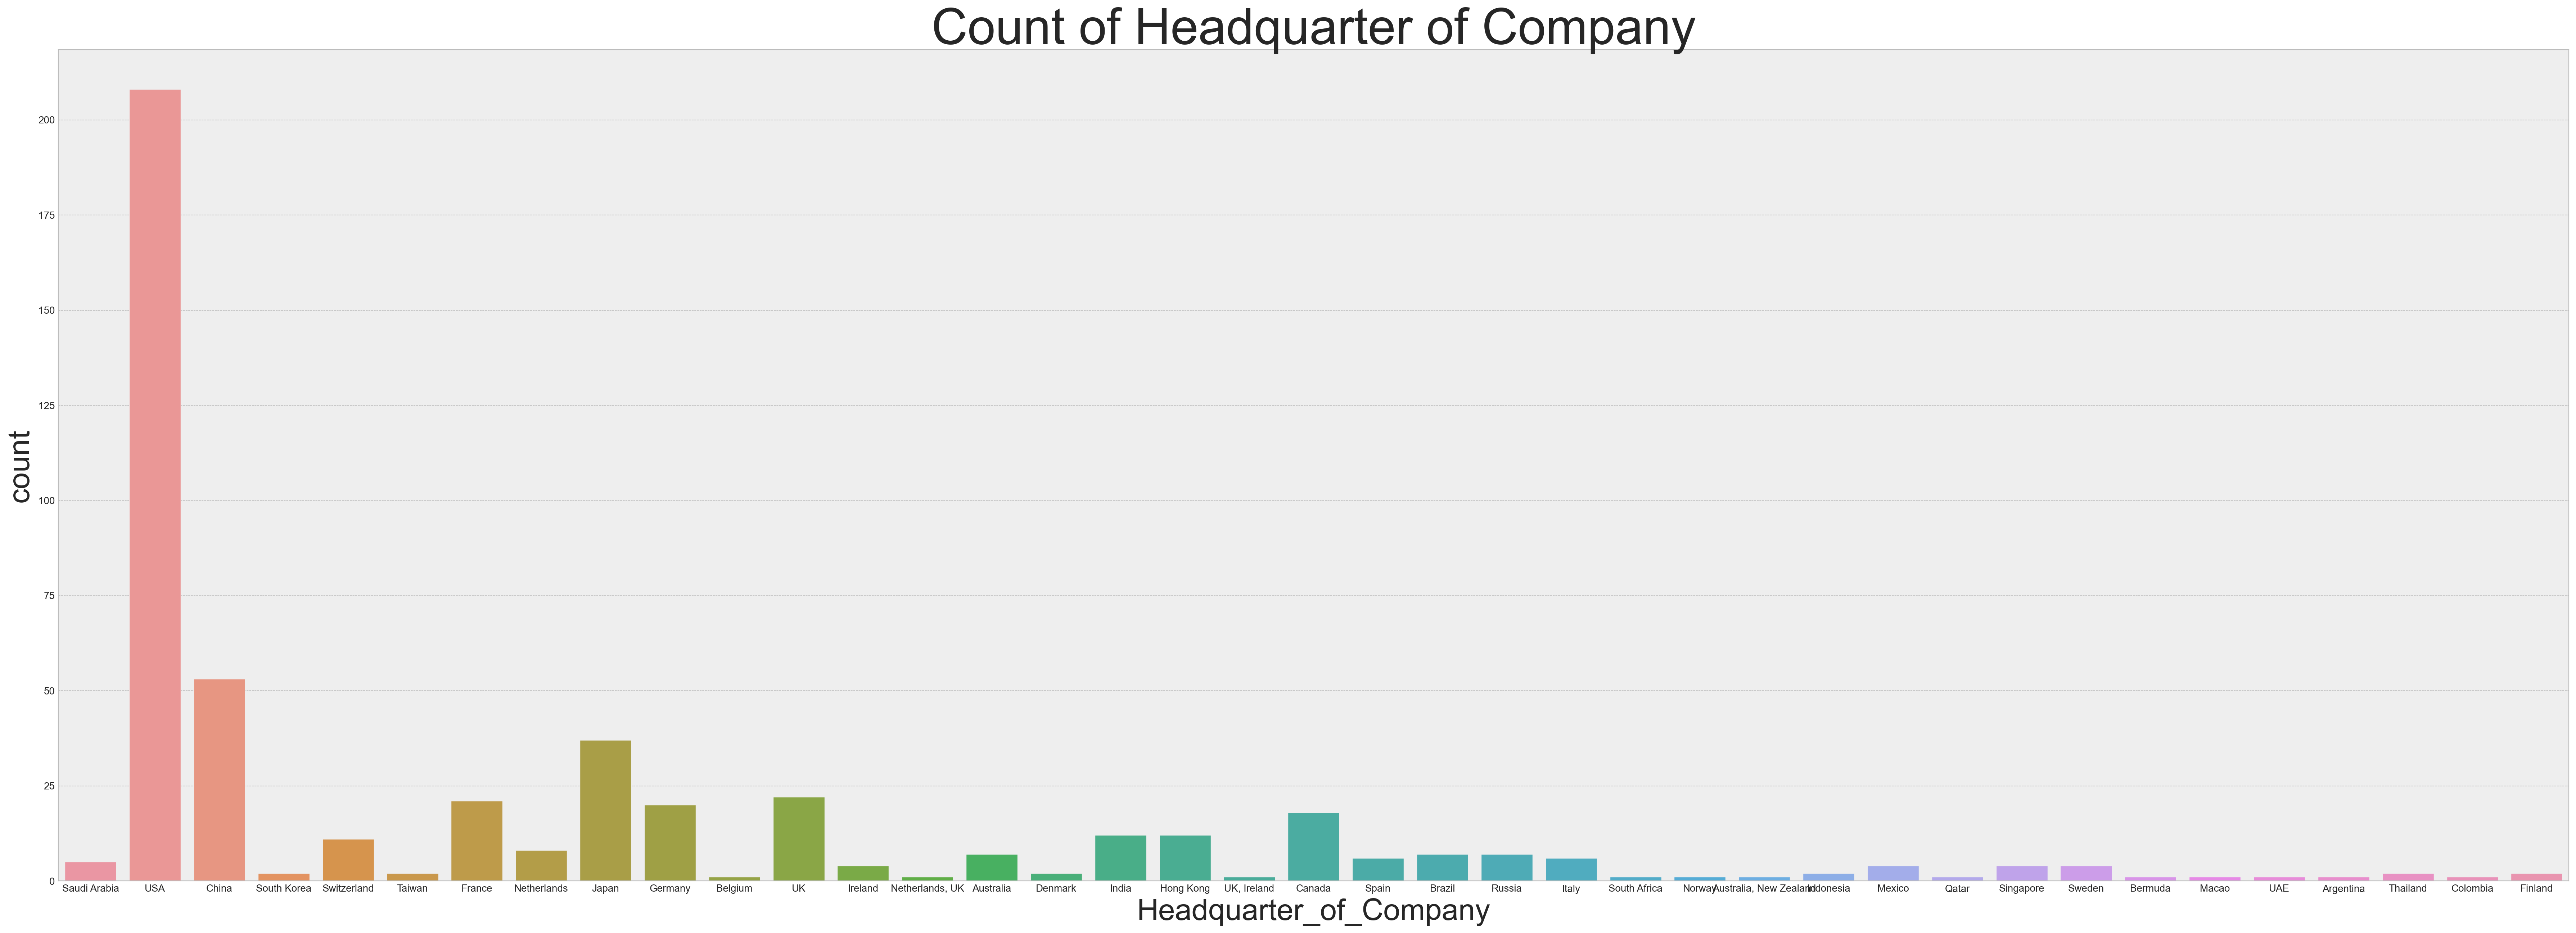

In [67]:
plt.figure(figsize=(45,15),dpi=100)
sns.countplot(data=final_df1,x='Headquarter_of_Company')
plt.xlabel('Headquarter_of_Company', fontsize=30)
plt.ylabel('count', fontsize=30)
plt.title('Count of Headquarter of Company',fontsize=50)
plt.show();

In [68]:
final_df1['Headquarter_of_Company'].value_counts()

USA                       208
China                      53
Japan                      37
UK                         22
France                     21
Germany                    20
Canada                     18
India                      12
Hong Kong                  12
Switzerland                11
Netherlands                 8
Russia                      7
Brazil                      7
Australia                   7
Italy                       6
Spain                       6
Saudi Arabia                5
Mexico                      4
Ireland                     4
Sweden                      4
Singapore                   4
Indonesia                   2
Thailand                    2
Denmark                     2
South Korea                 2
Taiwan                      2
Finland                     2
South Africa                1
Norway                      1
Australia, New Zealand      1
UK, Ireland                 1
Qatar                       1
Belgium                     1
Bermuda   

## 2. For Numerical


1. Histogram
2. Box plot
3. Distribution/Density plot

In [69]:
final_df1.select_dtypes(include=np.number).columns

Index(['World_Ranks(Jan-2020)', 'Market_Cap(In_Billion_USD)',
       'Total_Employees'],
      dtype='object')

## distribution plot

<Figure size 1500x500 with 0 Axes>

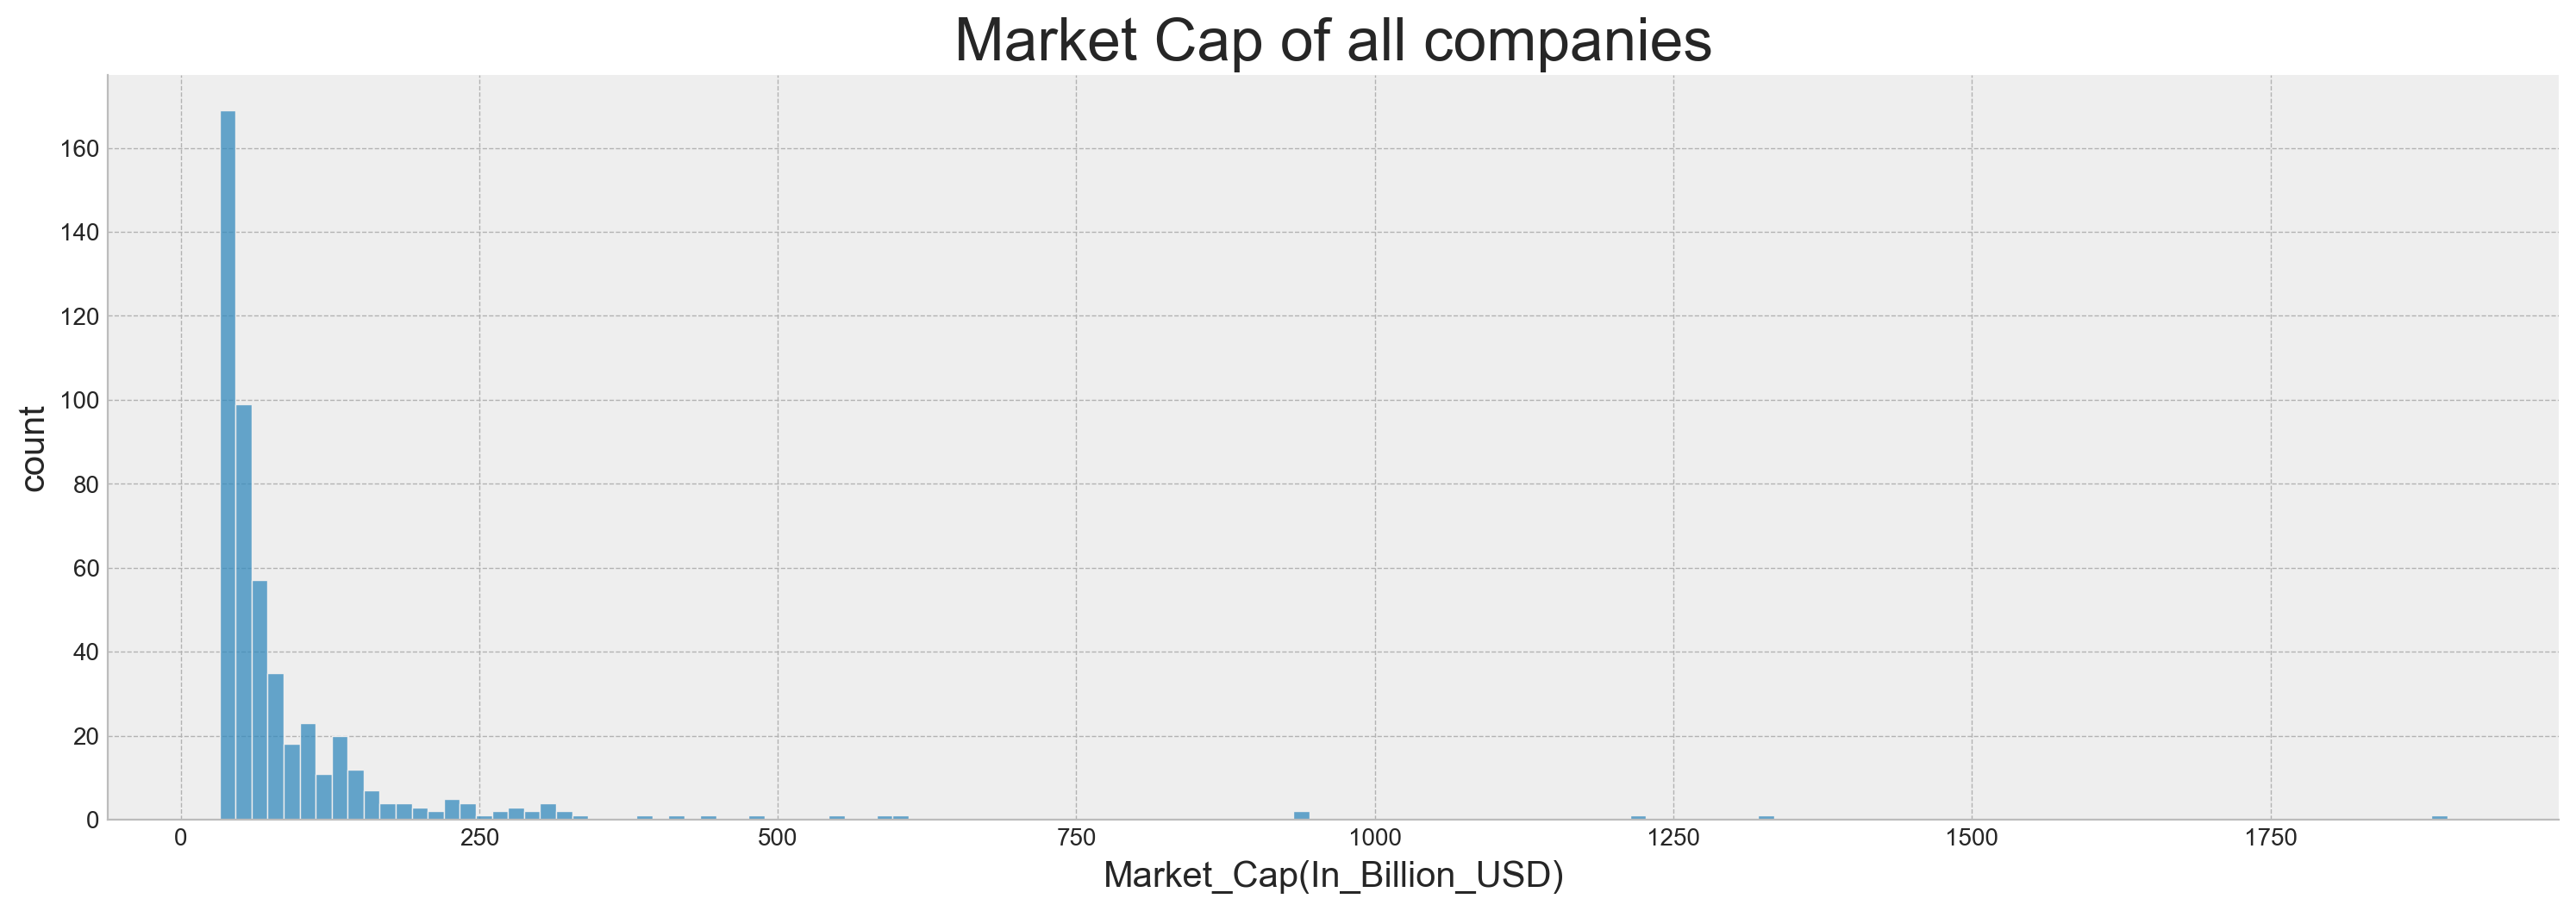

In [70]:
plt.figure(figsize=(15,5))
sns.displot(data = final_df1, x = 'Market_Cap(In_Billion_USD)',height=5,aspect=15/5)
plt.xlabel('Market_Cap(In_Billion_USD)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('Market Cap of all companies',fontsize=25)
plt.show();


## Bivariate Analysis

In [71]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Names               500 non-null    object 
 1   World_Ranks(Jan-2020)       500 non-null    int64  
 2   Market_Cap(In_Billion_USD)  500 non-null    float64
 3   Headquarter_of_Company      500 non-null    object 
 4   Annual_Revenue_till         500 non-null    object 
 5   Annual_revenue              500 non-null    object 
 6   Annual_Net_Income_till      500 non-null    object 
 7   Annual_Net_income           500 non-null    object 
 8   Sector                      500 non-null    object 
 9   Total_Employees             500 non-null    int32  
 10  Employee_Count_as_on_Date   500 non-null    object 
 11  CEO                         500 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 45.0+ KB


## Categorical & Numerical

1. Bar chart
2. Group By
3. Pivot

## Bar Chart

In [72]:
plt.figure(figsize=(15,5),dpi=100)
plt.barh(final_df1['Company_Names'][:10],final_df1['Market_Cap(In_Billion_USD)'][:10],color = 'red', edgecolor= 'blue')

plt.xlabel('Market cap', fontsize=16)
plt.ylabel('company names', fontsize=16);

## Numerical & Numerical

1. Correlation
2. Scatter plot
3. Heat map

## Heat Map

In [73]:
final_df1.corr()

,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Total_Employees
World_Ranks(Jan-2020),1.00,-0.52,-0.24
Market_Cap(In_Billion_USD),-0.52,1.00,0.24
Total_Employees,-0.24,0.24,1.00


In [74]:
sns.heatmap(final_df1.corr(),cmap='winter',annot=True)
plt.title('Heat Map',fontsize=25);

# For Visualization

In [75]:
final_df2=final_df1.copy()

In [76]:
final_df2['Annual_Revenue']=final_df2['Annual_revenue'].apply(lambda x: str(x).split()).apply(lambda x:x[0])
final_df2['Annual_Net_Income']=final_df2['Annual_Net_income'].apply(lambda x: str(x).split()).apply(lambda x:x[0])

In [77]:
final_df2['Annual_Revenue(mbtc)']=final_df2['Annual_revenue'].apply(lambda x: str(x).split()).apply(lambda x:x[1:3])
final_df2['Annual_Net_Income(mbtc)']=final_df2['Annual_Net_income'].apply(lambda x: str(x).split()).apply(lambda x:x[1:3])

In [78]:
final_df2['Annual_Revenue(mbtc)']=final_df2['Annual_Revenue(mbtc)'].apply(lambda x: ' '.join(x))
final_df2['Annual_Net_Income(mbtc)']=final_df2['Annual_Net_Income(mbtc)'].apply(lambda x: ' '.join(x))

In [79]:
final_df2

,Company_Names,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Headquarter_of_Company,Annual_Revenue_till,Annual_revenue,Annual_Net_Income_till,Annual_Net_income,Sector,Total_Employees,Employee_Count_as_on_Date,CEO,Annual_Revenue,Annual_Net_Income,Annual_Revenue(mbtc),Annual_Net_Income(mbtc)
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),1,1898.10,Saudi Arabia,2020,862 Billion SAR,2020,185 Billion SAR,"Energy, Oil and Gas, Chemicals, Oil Refining, ...",79800,2021,Amin H. Al-Nasser,862,185,Billion SAR,Billion SAR
1,APPLE,2,1323.00,USA,2020,274.51 Billion USD,2020,57.41 Billion USD,"Technology, Mobiles & Accessories, Electronics...",154000,2021,Tim Cook,274.51,57.41,Billion USD,Billion USD
2,MICROSOFT CORPORATION,3,1215.00,USA,2020,143.00 Billion USD,2020,44.30 Billion USD,"Technology, Software and IT, Laptops, Video Ga...",182268,2021,Satya Nadella,143.00,44.30,Billion USD,Billion USD
3,ALPHABET,4,943.90,USA,2020,182.52 Billion USD,2020,40.26 Billion USD,"Technology, Internet or Mobile App Based Busin...",156500,2021,Sundar Pichai,182.52,40.26,Billion USD,Billion USD
4,AMAZON.COM,5,941.03,USA,2020,386.06 Billion USD,2020,21.33 Billion USD,"eCommerce, Internet or Mobile App Based Busine...",1335000,2021,Andy Jassy,386.06,21.33,Billion USD,Billion USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,SEVEN & I HOLDINGS,471,32.65,Japan,2019,644 Billion JPY,2019,218 Billion JPY,"Consumer Defensive, Retail, Super Markets, Con...",138808,2021,Ryuichi Isaka,644,218,Billion JPY,Billion JPY
496,ASSICURAZIONI GENERALI,472,32.61,Italy,2019,693 Million EUR,2019,670 Million EUR,"Financial Services, Insurance",72644,2021,Philippe Donnet,693,670,Million EUR,Million EUR
497,AMPHENOL CORPORATION,473,32.53,USA,2019,225 Million USD,2019,155 Million USD,"Technology, Electronics, Cables and Wires, Ele...",90000,2021,Richard Adam Norwitt,225,155,Million USD,Million USD
498,GENERAL MILLS,474,32.52,USA,2019,627 Million USD,2019,181 Million USD,"Consumer Defensive, Food Products, FMCG, Dairy...",35000,2021,Jeff Harmening,627,181,Million USD,Million USD


In [80]:
final_df2.replace('',np.nan, inplace=True)

In [81]:
final_df2.isna().sum()

Company_Names                 0
World_Ranks(Jan-2020)         0
Market_Cap(In_Billion_USD)    0
Headquarter_of_Company        0
Annual_Revenue_till           0
Annual_revenue                0
Annual_Net_Income_till        0
Annual_Net_income             0
Sector                        0
Total_Employees               0
Employee_Count_as_on_Date     0
CEO                           0
Annual_Revenue                0
Annual_Net_Income             0
Annual_Revenue(mbtc)          0
Annual_Net_Income(mbtc)       0
dtype: int64

In [82]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Names               500 non-null    object 
 1   World_Ranks(Jan-2020)       500 non-null    int64  
 2   Market_Cap(In_Billion_USD)  500 non-null    float64
 3   Headquarter_of_Company      500 non-null    object 
 4   Annual_Revenue_till         500 non-null    object 
 5   Annual_revenue              500 non-null    object 
 6   Annual_Net_Income_till      500 non-null    object 
 7   Annual_Net_income           500 non-null    object 
 8   Sector                      500 non-null    object 
 9   Total_Employees             500 non-null    int32  
 10  Employee_Count_as_on_Date   500 non-null    object 
 11  CEO                         500 non-null    object 
 12  Annual_Revenue              500 non-null    object 
 13  Annual_Net_Income           500 non

In [83]:
final_df2['Annual_Net_Income']=final_df2['Annual_Net_Income'].str.strip().str.replace('-', '')

In [84]:
final_df2['Annual_Revenue']=final_df2['Annual_Revenue'].astype(float)

In [85]:
final_df2

,Company_Names,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Headquarter_of_Company,Annual_Revenue_till,Annual_revenue,Annual_Net_Income_till,Annual_Net_income,Sector,Total_Employees,Employee_Count_as_on_Date,CEO,Annual_Revenue,Annual_Net_Income,Annual_Revenue(mbtc),Annual_Net_Income(mbtc)
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),1,1898.10,Saudi Arabia,2020,862 Billion SAR,2020,185 Billion SAR,"Energy, Oil and Gas, Chemicals, Oil Refining, ...",79800,2021,Amin H. Al-Nasser,862.00,185,Billion SAR,Billion SAR
1,APPLE,2,1323.00,USA,2020,274.51 Billion USD,2020,57.41 Billion USD,"Technology, Mobiles & Accessories, Electronics...",154000,2021,Tim Cook,274.51,57.41,Billion USD,Billion USD
2,MICROSOFT CORPORATION,3,1215.00,USA,2020,143.00 Billion USD,2020,44.30 Billion USD,"Technology, Software and IT, Laptops, Video Ga...",182268,2021,Satya Nadella,143.00,44.30,Billion USD,Billion USD
3,ALPHABET,4,943.90,USA,2020,182.52 Billion USD,2020,40.26 Billion USD,"Technology, Internet or Mobile App Based Busin...",156500,2021,Sundar Pichai,182.52,40.26,Billion USD,Billion USD
4,AMAZON.COM,5,941.03,USA,2020,386.06 Billion USD,2020,21.33 Billion USD,"eCommerce, Internet or Mobile App Based Busine...",1335000,2021,Andy Jassy,386.06,21.33,Billion USD,Billion USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,SEVEN & I HOLDINGS,471,32.65,Japan,2019,644 Billion JPY,2019,218 Billion JPY,"Consumer Defensive, Retail, Super Markets, Con...",138808,2021,Ryuichi Isaka,644.00,218,Billion JPY,Billion JPY
496,ASSICURAZIONI GENERALI,472,32.61,Italy,2019,693 Million EUR,2019,670 Million EUR,"Financial Services, Insurance",72644,2021,Philippe Donnet,693.00,670,Million EUR,Million EUR
497,AMPHENOL CORPORATION,473,32.53,USA,2019,225 Million USD,2019,155 Million USD,"Technology, Electronics, Cables and Wires, Ele...",90000,2021,Richard Adam Norwitt,225.00,155,Million USD,Million USD
498,GENERAL MILLS,474,32.52,USA,2019,627 Million USD,2019,181 Million USD,"Consumer Defensive, Food Products, FMCG, Dairy...",35000,2021,Jeff Harmening,627.00,181,Million USD,Million USD


In [86]:
final_df2=final_df2.replace('',np.NaN)

In [87]:
final_df2['Annual_Net_Income']=final_df2['Annual_Net_Income'].astype(float)

In [88]:
#final_df2['Annual_Revenue'].interpolate(method='ffill', limit_direction='forward',inplace=True)
final_df2['Annual_Net_Income'].interpolate(method='ffill', limit_direction='forward',inplace=True)

In [89]:
final_df2.isna().sum()

Company_Names                 0
World_Ranks(Jan-2020)         0
Market_Cap(In_Billion_USD)    0
Headquarter_of_Company        0
Annual_Revenue_till           0
Annual_revenue                0
Annual_Net_Income_till        0
Annual_Net_income             0
Sector                        0
Total_Employees               0
Employee_Count_as_on_Date     0
CEO                           0
Annual_Revenue                0
Annual_Net_Income             0
Annual_Revenue(mbtc)          0
Annual_Net_Income(mbtc)       0
dtype: int64

In [90]:
final_df2.head()

,Company_Names,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Headquarter_of_Company,Annual_Revenue_till,Annual_revenue,Annual_Net_Income_till,Annual_Net_income,Sector,Total_Employees,Employee_Count_as_on_Date,CEO,Annual_Revenue,Annual_Net_Income,Annual_Revenue(mbtc),Annual_Net_Income(mbtc)
0,SAUDI ARABIAN OIL COMPANY (Saudi Aramco),1,1898.10,Saudi Arabia,2020,862 Billion SAR,2020,185 Billion SAR,"Energy, Oil and Gas, Chemicals, Oil Refining, ...",79800,2021,Amin H. Al-Nasser,862.00,185.00,Billion SAR,Billion SAR
1,APPLE,2,1323.00,USA,2020,274.51 Billion USD,2020,57.41 Billion USD,"Technology, Mobiles & Accessories, Electronics...",154000,2021,Tim Cook,274.51,57.41,Billion USD,Billion USD
2,MICROSOFT CORPORATION,3,1215.00,USA,2020,143.00 Billion USD,2020,44.30 Billion USD,"Technology, Software and IT, Laptops, Video Ga...",182268,2021,Satya Nadella,143.00,44.30,Billion USD,Billion USD
3,ALPHABET,4,943.90,USA,2020,182.52 Billion USD,2020,40.26 Billion USD,"Technology, Internet or Mobile App Based Busin...",156500,2021,Sundar Pichai,182.52,40.26,Billion USD,Billion USD
4,AMAZON.COM,5,941.03,USA,2020,386.06 Billion USD,2020,21.33 Billion USD,"eCommerce, Internet or Mobile App Based Busine...",1335000,2021,Andy Jassy,386.06,21.33,Billion USD,Billion USD


In [91]:
final_df2.to_csv(r'C:\projects\Company_vi.csv')
final_df2.to_excel(r'C:\projects\Company_vi.xlsx')

# Multivariate Analysis

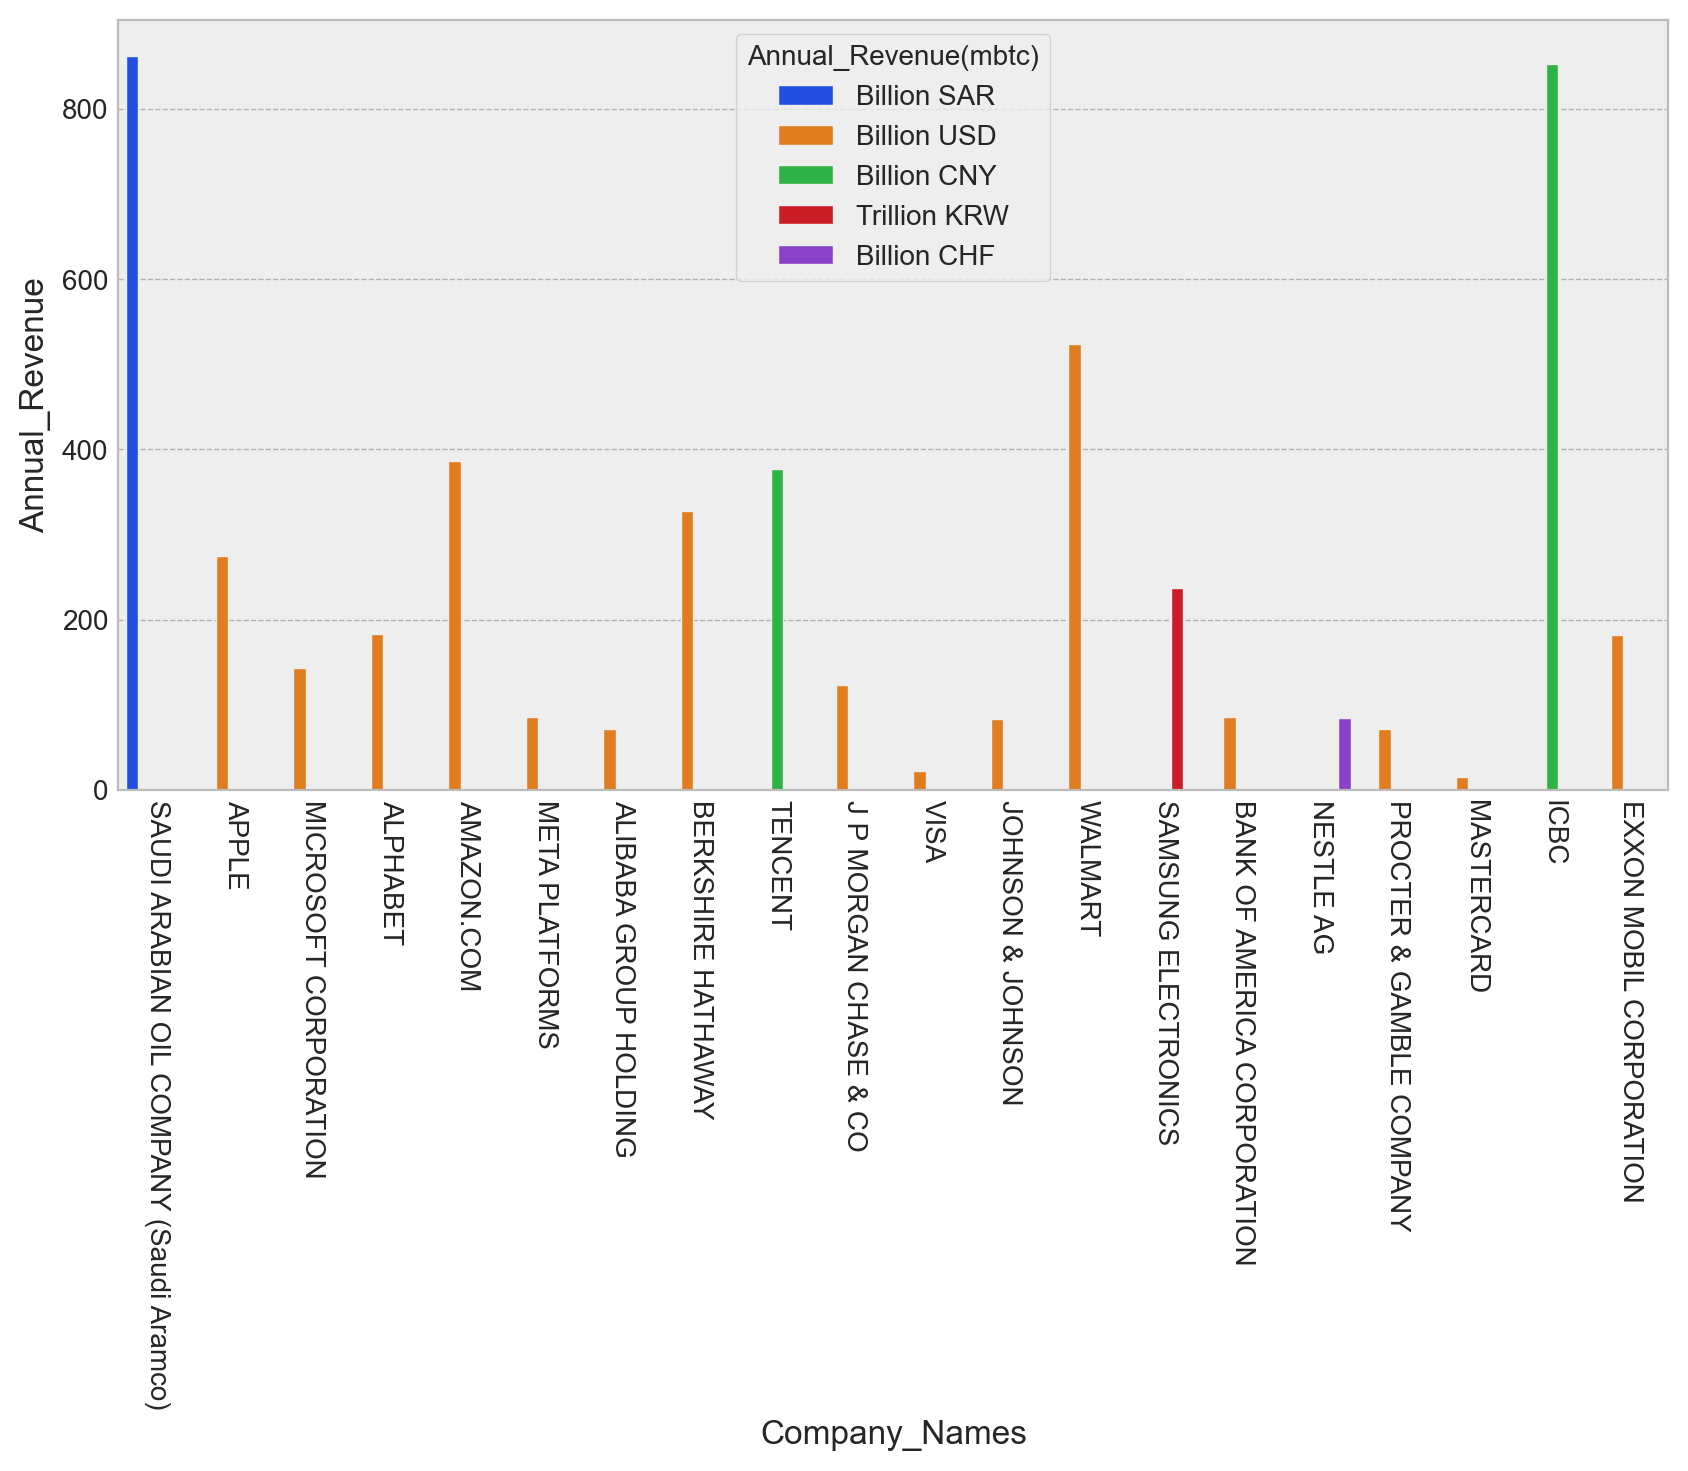

In [94]:
plt.figure(figsize=(10,5))
sns.barplot(x='Company_Names',y='Annual_Revenue',hue='Annual_Revenue(mbtc)',
            data=final_df2[:20],ci=None,palette='bright',estimator=np.sum)
plt.xticks(rotation=270)
plt.show();

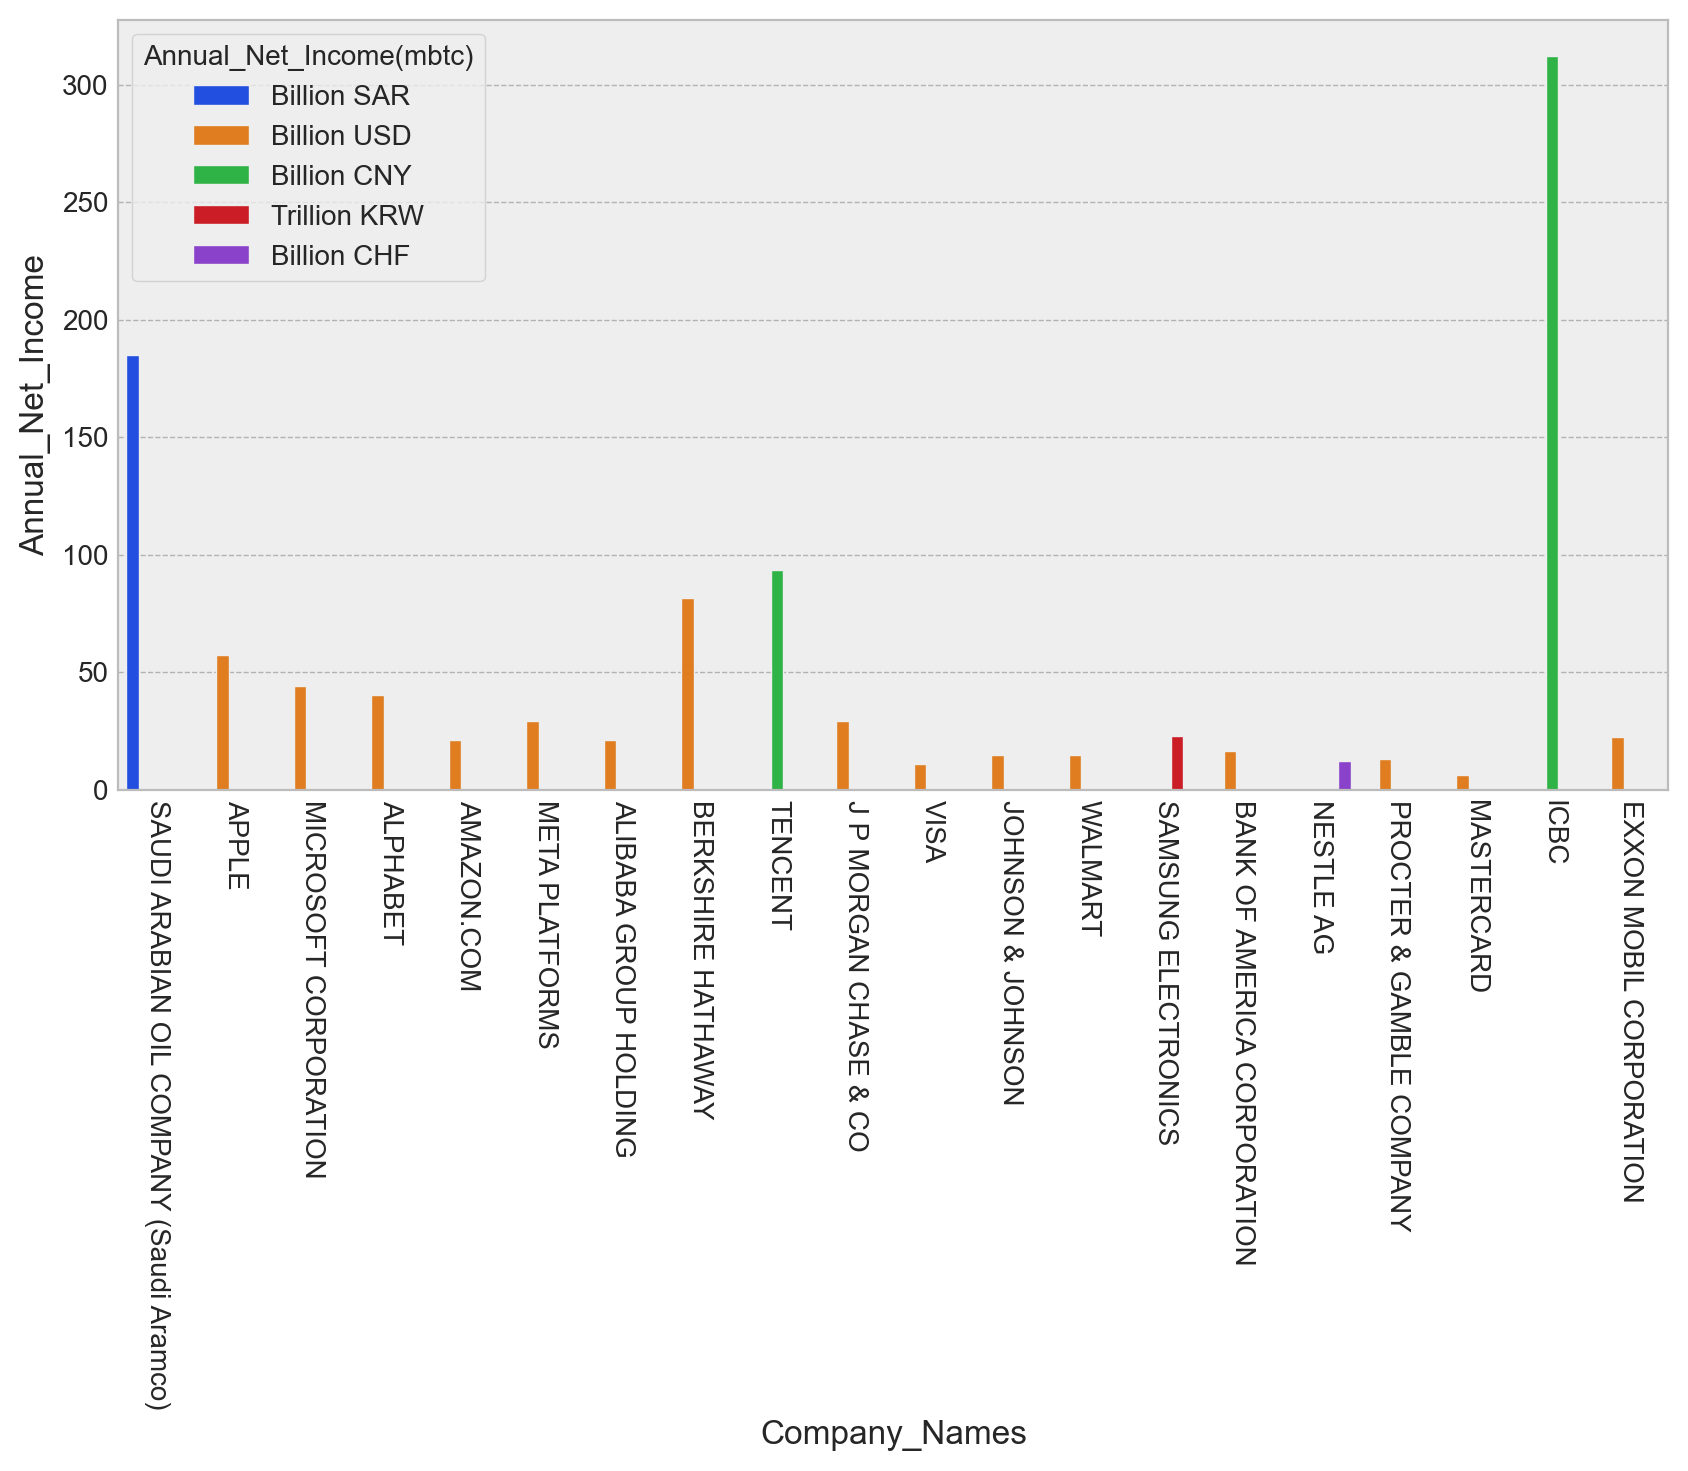

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(x='Company_Names',y=final_df2['Annual_Net_Income'],hue='Annual_Net_Income(mbtc)',
            data=final_df2[:20],ci=None,palette='bright',estimator=np.sum)
plt.xticks(rotation=270)
plt.show();

In [96]:
final_df1[(final_df1['Headquarter_of_Company']=='India') ]

,Company_Names,World_Ranks(Jan-2020),Market_Cap(In_Billion_USD),Headquarter_of_Company,Annual_Revenue_till,Annual_revenue,Annual_Net_Income_till,Annual_Net_income,Sector,Total_Employees,Employee_Count_as_on_Date,CEO
70,RELIANCE INDUSTRIES,70,136.37,India,2020,205 Crores INR,2020,324 Crores INR,"Energy, Conglomerate, Oil and Gas, Chemicals, ...",236330,2021,Mukesh Ambani
98,TATA CONSULTANCY SERVICES (TCS),97,113.36,India,2020,1569.5 Billion INR,2020,324.5 Billion INR,"Technology, Software and IT, Software Consulti...",606331,2022,Rajesh Gopinathan
124,HDFC BANK,120,98.69,India,2020,1470.68 Billion INR,2020,272.9 Billion INR,"Financial Services, Banking Services",120093,2021,Sashidhar Jagdishan
231,HDFC,216,59.70,India,2020,1017.25 Billion INR,2020,170.80 Billion INR,"Financial Services, Banking Services, Asset Ma...",3226,2021,Sashidhar Jagdishan
235,HINDUSTAN UNILEVER,220,58.44,India,2019,387 Billions INR,2019,60 Billions INR,"Consumer Defensive, FMCG, Food Products, Perso...",21000,2021,Sanjiv Mehta
302,ICICI BANK,283,48.99,India,2020,401.21 Billion INR,2020,112.25 Billion INR,"Financial Services, Banking Services, Wealth M...",130170,2021,Sandeep Bakhshi
343,KOTAK MAHINDRA BANK,324,44.70,India,2020,502.99 Billion INR,2020,86.07 Billion INR,"Financial Services, Banking Services",71000,2021,Uday Kotak
355,INFOSYS,335,43.80,India,2020,907.91 Billion INR,2020,166.39 Billion INR,"Technology, Software and IT, Software Products...",314015,2022,Salil Parekh
372,STATE BANK OF INDIA,352,42.41,India,2020,3622.29 Billion INR,2020,181.76 Billion INR,"Financial Services, Banking Services, Wealth M...",245642,2021,Vinay M Tonse
383,ITC,362,41.10,India,2019,483.53 Billion INR,2019,128.24 Billion INR,"Consumer Defensive, Tobacco Products, Cigarett...",36500,2021,Sanjiv Puri
